<a href="https://colab.research.google.com/github/kzeynep/Python_Atil_hoca/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv("1-studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.shape

(33, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [6]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


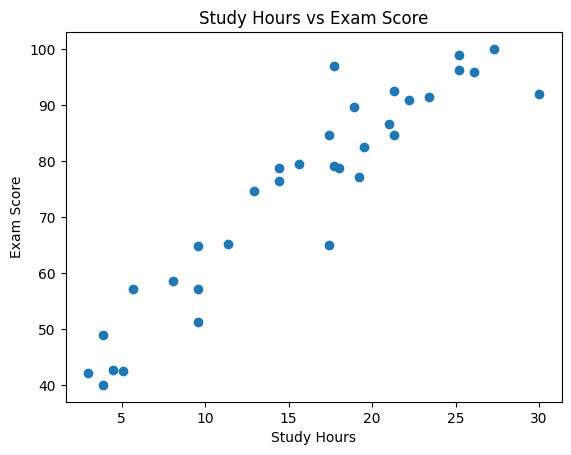

In [7]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [8]:
# independent and dependent features

In [9]:
X = df[["Study Hours"]]
y = df["Exam Score"]

In [10]:
# test - train split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [13]:
X_train

,Study Hours
21,8.1
12,30.0
0,3.9
4,14.4
16,5.7
5,18.0
13,27.3
11,26.1
24,9.6
1,9.6


In [14]:
# standardize the data set

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [17]:
# balanced feature values
# efficient gradient descent
# l1 , l2

In [18]:
scaler = StandardScaler() # kolonlar arası büyük farklılığı gidermek için

In [19]:
X_train = scaler.fit_transform(X_train) # burada (x-ortalama)/ standart sapma hesaplama yapıldığı için
X_test = scaler.transform(X_test) # burada yapılmasını istemiyorum bu test için ayrıldığı için


In [20]:
X_train

array([[-0.89166498],
       [ 1.91959769],
       [-1.43081124],
       [-0.08294558],
       [-1.19974856],
       [ 0.37917979],
       [ 1.57300366],
       [ 1.41896187],
       [-0.69911274],
       [-0.69911274],
       [-1.35379035],
       [ 0.57173203],
       [-0.46805005],
       [ 0.07109621],
       [-1.54634258],
       [ 1.07236785],
       [-0.08294558],
       [ 0.3021589 ],
       [-1.27676945],
       [ 0.53322158],
       [-1.43081124],
       [ 0.49471113],
       [ 0.91832606],
       [ 0.80279471],
       [ 0.76428427],
       [ 0.34066934]])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regression = LinearRegression()

In [23]:
regression.fit(X_train , y_train)

LinearRegression()

In [24]:
print(regression.coef_)
print(regression.intercept_)

[17.77325513]
71.58461538461538


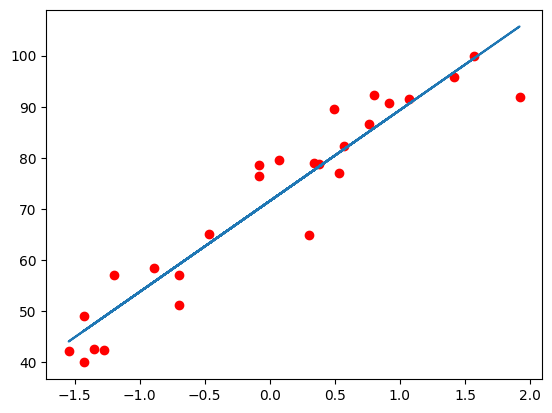

In [25]:
plt.scatter(X_train , y_train , color="red")
plt.plot(X_train , regression.predict(X_train))

In [26]:
# x = 20 y =?

In [27]:
regression.predict([[20]])

array([427.04971807])

In [28]:
scaler.transform([[20]])

array([[0.63591611]])

In [29]:
regression.predict(scaler.transform([[20]]))

array([82.8869146])

In [30]:
regression.predict(scaler.transform([[0]]))

array([37.25651403])

In [31]:
regression.predict(scaler.transform([[29]]))

array([103.42059486])

In [32]:
# prediction with test data

In [33]:
regression.predict(X_test)

array([94.75081875, 77.63941854, 59.15910631, 66.6881224 , 94.75081875,
       76.95496253, 85.85289064])

In [34]:
X_test

array([[ 1.30343053],
       [ 0.34066934],
       [-0.69911274],
       [-0.27549782],
       [ 1.30343053],
       [ 0.3021589 ],
       [ 0.80279471]])

In [35]:
y_pred_test = regression.predict(X_test)

In [36]:
y_test

,Exam Score
31,96.2
15,97.0
26,64.8
17,74.7
8,99.0
9,84.6
19,84.7


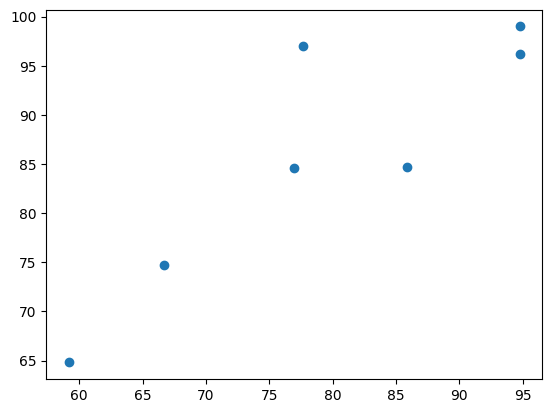

In [37]:
plt.scatter(y_pred_test , y_test)

In [38]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [39]:
mse = mean_absolute_error(y_test , y_pred_test)
mae = mean_squared_error(y_test , y_pred_test)
rmse = np.sqrt(mse)

In [40]:
print("mse :",mse)
print("mae :",mae)
print("rmse :",rmse)

mse : 6.787091909266651
mae : 78.68191446465701
rmse : 2.6052047730008963


In [41]:
r2 = r2_score(y_test , y_pred_test)
print("r2 :",r2)

r2 : 0.4349170848122318


In [44]:
#adjusted r2 score

In [43]:
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3219005017746781